We will plot some figure showing how fast we are and how much further we scale.

In [11]:
import matplotlib.pyplot as plt
import yaml
import os
from pathlib import Path

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [12]:
def make_path(device, problem):
    path = (
        Path("__file__").resolve().parent
        / Path("results")
        / Path(f"{device}")
        / Path(f"{problem}")
    )

    if not os.path.exists(path):
        os.makedirs(path)
    return path

In [13]:
def get_times(device, problem):
    path = make_path(device, problem)
    with open(path / "times.yaml", 'r') as f:
        times = yaml.safe_load(f)
    return times


def plot_times(problem):
    cpu_times = get_times("cpu", problem)
    gpu_times = get_times("gpu", problem)
    plt.plot(cpu_times, label=f'{problem}_cpu', color='r')
    plt.plot(gpu_times, label=f'{problem}_gpu', color='b')
    plt.xlabel('Bitwidth')
    plt.ylabel('Time (s)')
    plt.yscale('log')
    plt.ylim(1e-3, 1e2)
    plt.legend()
    plt.tight_layout()
    plt.show()

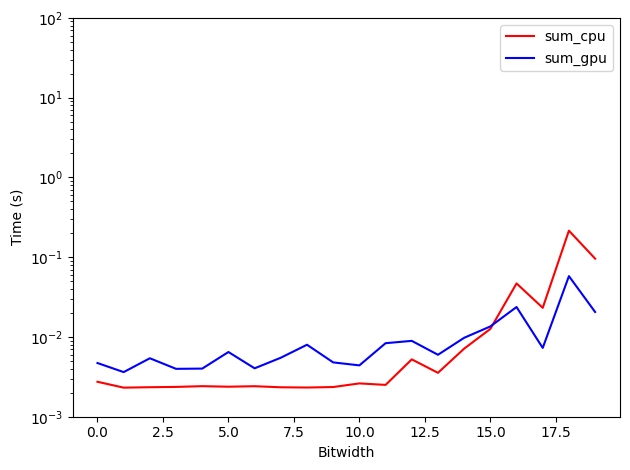

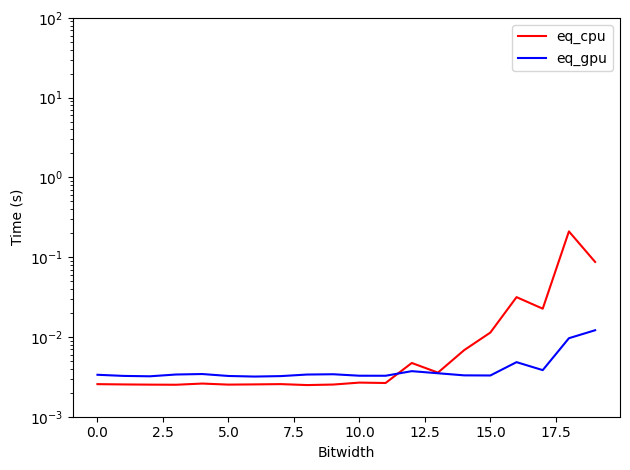

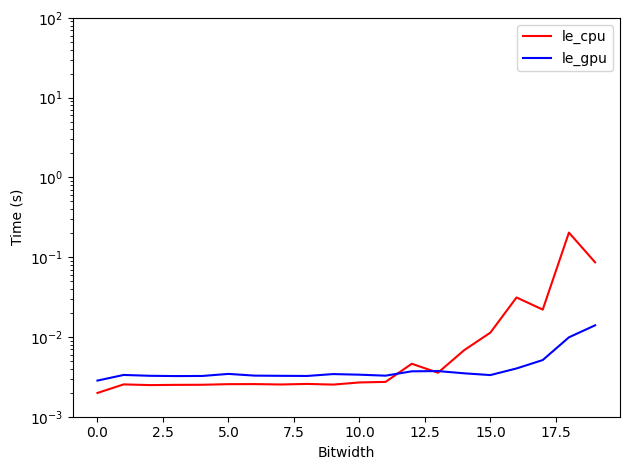

In [17]:

plot_times("sum")
plot_times("eq")
plot_times("le")

